In [1]:
import os
os.chdir('../')


In [2]:
# print(os.listdir())
files = [f'results/genemark/{f}' for f in os.listdir('results/genemark')]
import csv

In [3]:
files
results = []
for file in files:
    with open(file) as f:
        rows = csv.reader(f)
        for row in rows:
            if len(row) > 1:
                if row[0] == 'correct':
                    # print(row)
                    # try:
                    results.append(int(row[1])/int(row[3]))
                    # except:
                        # print(row)

In [4]:
print(results)

[0.03279079757529473, 0.024072451066316097, 0.024158347378884136, 0.01612718254537114, 0.04023149969095915, 0.009205605556240497, 0.018147377283038283, 0.021254240721049165, 0.0035485530774826564, 0.027758762322015334, 0.0, 0.08436999630496367, 0.011019920625746542, 0.0004426105455531918, 0.009567854689254177, 0.010734522929644882, 0.0033873833851621503, 0.07323565739597086, 0.018303049622781852, 0.012486410933374747, 0.0031574369930612014, 0.020967215945059372, 0.007253129736709145]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
arr = np.array(results)

In [7]:
arr.mean()

0.020531304622779696

Text(0.04, 3, '$\\mu=0.020531$')

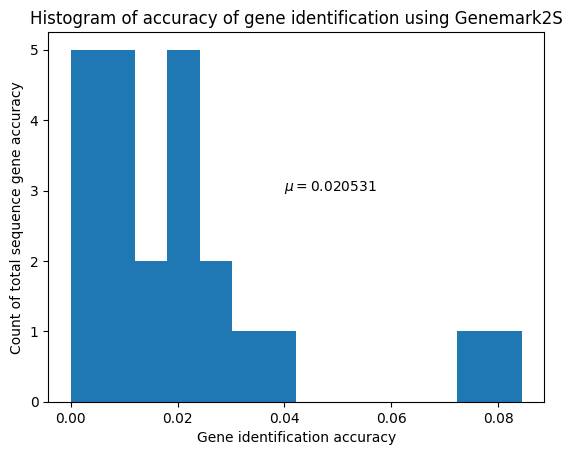

In [12]:
plt.hist(arr,bins=14)
plt.title('Histogram of accuracy of gene identification using Genemark2S')

plt.xlabel('Gene identification accuracy')
plt.ylabel('Count of total sequence gene accuracy')


plt.text(0.04, 3, r'$\mu=0.020531$')
